In [13]:
### **Goal:** Confirm your data and create an exploratory analysis notebook with stat analysis and visualization.

### DELIVERABLES

#### Exploratory Analysis Writeup

#**Requirements:**
# Review the data set and project with an EIR during office hours.
#Practice importing (potentially unformatted) data into clean matrices|data frames, and if necessary, export into a form that makes sense (text files or a database, for example).
# Explore the mathematical properties and visualize data through a python visualization tool (matplotlib and seaborn)
# Provide insight about the data set and any impact on a hypothesis.


In [1]:
import pandas as pd
import json
import statsmodels.api as sm
import pylab as pl
import numpy as np

data = pd.read_csv("/Users/MikaBook/Downloads/3-Year_Recidivism_for_Offenders_Released_from_Prison.csv", sep=',')

In [11]:
data.describe()

,Fiscal Year Released,Recidivism Reporting Year,Days to Recidivism
count,17060.000000,17060.000000,5404.000000
mean,2011.609496,2014.609496,473.166358
std,1.105981,1.105981,283.185134
min,2010.000000,2013.000000,0.000000
25%,2011.000000,2014.000000,241.000000
50%,2012.000000,2015.000000,418.000000
75%,2013.000000,2016.000000,687.000000
max,2013.000000,2016.000000,1095.000000


In [37]:
### Datasets
# Description of data set available, at the field level (see table): 

data.head(10)

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Recidivism Type,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population
0,2010,2013,White - Non-Hispanic,M,Under 25,D Felony,Violent,Assault,Parole,4JD,Yes,Tech,16.0,NaN,NaN,NaN,Yes
1,2010,2013,White - Non-Hispanic,M,55 and Older,D Felony,Public Order,OWI,Parole,7JD,Yes,Tech,19.0,NaN,NaN,NaN,Yes
2,2010,2013,White - Non-Hispanic,M,25-34,D Felony,Property,Burglary,Parole,5JD,Yes,Tech,22.0,NaN,NaN,NaN,Yes
3,2010,2013,White - Non-Hispanic,M,55 and Older,C Felony,Drug,Trafficking,Parole,8JD,Yes,Tech,25.0,NaN,NaN,NaN,Yes
4,2010,2013,Black - Non-Hispanic,M,25-34,D Felony,Drug,Trafficking,Parole,3JD,Yes,Tech,26.0,NaN,NaN,NaN,Yes
5,2010,2013,White - Non-Hispanic,M,Under 25,D Felony,Property,Burglary,Discharged – End of Sentence,NaN,Yes,Tech,27.0,NaN,NaN,NaN,No
6,2010,2013,White - Non-Hispanic,M,45-54,Aggravated Misdemeanor,Public Order,Sex Offender Registry/Residency,Parole,3JD,Yes,New,28.0,D Felony,Property,Theft,Yes
7,2010,2013,White - Non-Hispanic,M,45-54,D Felony,Property,Burglary,Parole,1JD,Yes,Tech,41.0,NaN,NaN,NaN,Yes
8,2010,2013,White - Non-Hispanic,M,45-54,Aggravated Misdemeanor,Violent,Other Violent,Parole,5JD,Yes,Tech,44.0,NaN,NaN,NaN,Yes
9,2010,2013,White - Non-Hispanic,M,45-54,C Felony,Violent,Robbery,Parole,8JD,Yes,Tech,46.0,NaN,NaN,NaN,Yes


In [14]:
data.corr()

,Fiscal Year Released,Recidivism Reporting Year,Days to Recidivism
Fiscal Year Released,1.000000,1.000000,-0.010371
Recidivism Reporting Year,1.000000,1.000000,-0.010371
Days to Recidivism,-0.010371,-0.010371,1.000000


In [16]:
### Well-articulated problem statement with "specific aim" and hypothesis, based on your lightning talk

# Specific Aim: 
# Understand relationship between recidivism and race, gender, age, convicting offense classification, and release type.
## Hypothesis:
## Male, younger, non-white, more "serious" or grave offenses will likely have greater likelihood of recidivism and 
## likely will have shorter amount of time before returning to prison (days to recidivism)

## METHODS AND MODELS
## Logistic Regression for predicting the likelihood of an individual will go back to prison (training and test data)
## Linear regression for predicting when an individual who is sent back to prison gets sent back (training and test data)
## Random Forest Modelling for predicting which category an individual will fall inot (low risk - no recidivism in 3 years)
### mid-risk (committ a crime, but not serious one) or high risk (committ a serious crime incl. murder, attempted murder
## aggravated assault, rape, arson)
 

## Goals: 
Be able to predict with >80% accuracy who is sent back to prison 
Look at the factors that are most important in determining who gets sent back to prison

Be able to predict with >70% when someone who is sent back gets sent back
Understand which factors are most important in determining when someone gets sent back to prison


SyntaxError: invalid syntax (<ipython-input-16-804e9fa1d859>, line 4)

In [17]:
# print column headers 

for x in data.columns.values:
    print x

Fiscal Year Released
Recidivism Reporting Year
Race - Ethnicity
Sex
Age At Release 
Convicting Offense Classification
Convicting Offense Type
Convicting Offense Subtype
Release Type
Main Supervising District
Recidivism - Return to Prison
Recidivism Type
Days to Recidivism
New Conviction Offense Classification
New Conviction Offense Type
New Conviction Offense Sub Type
Part of Target Population


In [45]:
# let's look at unique row values 
data['Release Type'].unique()
data['Sex'].unique()
data['Recidivism - Return to Prison'].unique()

array(['Yes', 'No'], dtype=object)

In [68]:
data['Race - Ethnicity'].unique()

array(['White - Non-Hispanic', 'Black - Non-Hispanic',
       'American Indian or Alaska Native - Non-Hispanic',
       'White - Hispanic', 'White - ',
       'Asian or Pacific Islander - Non-Hispanic', 'Black - Hispanic',
       'American Indian or Alaska Native - Hispanic',
       'Asian or Pacific Islander - Hispanic', 'Black - ', 'N/A - ', nan], dtype=object)

In [76]:
df['Age At Release '].unique()

array(['Under 25', '55 and Older', '25-34', '45-54', '35-44', 'NA'], dtype=object)

In [31]:
#how many missing values? 

print data.isnull().sum()

Fiscal Year Released                         0
Recidivism Reporting Year                    0
Race - Ethnicity                            30
Sex                                          3
Age At Release                               3
Convicting Offense Classification            0
Convicting Offense Type                      0
Convicting Offense Subtype                   0
Release Type                                 0
Main Supervising District                 6708
Recidivism - Return to Prison                0
Recidivism Type                              0
Days to Recidivism                       11656
New Conviction Offense Classification    13619
New Conviction Offense Type              13619
New Conviction Offense Sub Type          13638
Part of Target Population                    0
dtype: int64


In [2]:
##fill missing values w/ NA

df = data.fillna('NA')

In [33]:
df.index

RangeIndex(start=0, stop=17060, step=1)

In [34]:
#group data by sex, race ethnicity
df.groupby(['Sex','Race - Ethnicity']).mean()

Fiscal Year Released  \
Sex Race - Ethnicity                                                        
F   American Indian or Alaska Native - Hispanic               2012.250000   
    American Indian or Alaska Native - Non-Hispanic           2011.396226   
    Asian or Pacific Islander - Non-Hispanic                  2011.928571   
    Black -                                                   2010.000000   
    Black - Hispanic                                          2012.000000   
    Black - Non-Hispanic                                      2011.591017   
    White - Hispanic                                          2011.712121   
    White - Non-Hispanic                                      2011.711401   
M   American Indian or Alaska Native - Hispanic               2011.200000   
    American Indian or Alaska Native - Non-Hispanic           2011.649057   
    Asian or Pacific Islander - Hispanic                      2011.000000   
    Asian or Pacific Islander - Non-Hispanic                  2011.616071   
    Black -                                                   2011.000000   
    Black - Hispanic                                          2011.916667   
    Black - Non-Hispanic                                      2011.624350   
    N/A -                                                     2011.000000   
    White -                                                   2010.818182   
    White - Hispanic                                          2011.473029   
    White - Non-Hispanic                                      2011.600465   

                                                     Recidivism Reporting Year  \
Sex Race - Ethnicity                                                             
F   American Indian or Alaska Native - Hispanic                    2015.250000   
    American Indian or Alaska Native - Non-Hispanic                2014.396226   
    Asian or Pacific Islander - Non-Hispanic                       2014.928571   
    Black -                                                        2013.000000   
    Black - Hispanic                                               2015.000000   
    Black - Non-Hispanic                                           2014.591017   
    White - Hispanic                                               2014.712121   
    White - Non-Hispanic                                           2014.711401   
M   American Indian or Alaska Native - Hispanic                    2014.200000   
    American Indian or Alaska Native - Non-Hispanic                2014.649057   
    Asian or Pacific Islander - Hispanic                           2014.000000   
    Asian or Pacific Islander - Non-Hispanic                       2014.616071   
    Black -                                                        2014.000000   
    Black - Hispanic                                               2014.916667   
    Black - Non-Hispanic                                           2014.624350   
    N/A -                                                          2014.000000   
    White -                                                        2013.818182   
    White - Hispanic                                               2014.473029   
    White - Non-Hispanic                                           2014.600465   

                                                     Days to Recidivism  
Sex Race - Ethnicity                                                     
F   American Indian or Alaska Native - Hispanic              312.000000  
    American Indian or Alaska Native - Non-Hispanic          426.000000  
    Asian or Pacific Islander - Non-Hispanic                 515.000000  
    Black -                                                         NaN  
    Black - Hispanic                                                NaN  
    Black - Non-Hispanic                                     493.450820  
    White - Hispanic                                         542.083333  
    White - Non-Hispanic                      

In [3]:
##ensure the counts are correct

#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(df["Recidivism - Return to Prison"])
df["Recidivism_Coded"] = coding(df["Recidivism - Return to Prison"], {'No':0,'Yes':1})
print '\nAfter Coding:'
print pd.value_counts(df["Recidivism_Coded"])

Before Coding:
No     11656
Yes     5404
Name: Recidivism - Return to Prison, dtype: int64

After Coding:
0    11656
1     5404
Name: Recidivism_Coded, dtype: int64


In [4]:
##do this for gender as well

print 'Before Coding:'
print pd.value_counts(df["Sex"])
df["Is_Female"] = coding(df["Sex"], {'F':1,'M':0})
print '\nAfter Coding:'
print pd.value_counts(df["Is_Female"])

Before Coding:
M     14956
F      2101
NA        3
Name: Sex, dtype: int64

After Coding:
0     14956
1      2101
NA        3
Name: Is_Female, dtype: int64


In [5]:
##do this for target population as well 
print 'Before Coding:'
print pd.value_counts(df["Part of Target Population"])
df["Is_Target_Population"] = coding(df["Part of Target Population"], {'Yes':1,'No':0})
print '\nAfter Coding:'
print pd.value_counts(df["Is_Target_Population"])

Before Coding:
Yes    10071
No      6989
Name: Part of Target Population, dtype: int64

After Coding:
1    10071
0     6989
Name: Is_Target_Population, dtype: int64


In [6]:
##do this for age as well, note: considered doing dummy variables, but realized that <25 should be lower than 25-34 etc.

print 'Before Coding:'
print pd.value_counts(df['Age At Release '])
df["Age_Coded"] = coding(df['Age At Release '], {'Under 25':12,'25-34': 29.5, '35-44': 39.5, '45-54':49.5, '55 and Older':67.5})
print '\nAfter Coding:'
print pd.value_counts(df["Age_Coded"])

Before Coding:
25-34           6245
35-44           4044
Under 25        3080
45-54           2880
55 and Older     808
NA                 3
Name: Age At Release , dtype: int64

After Coding:
29.5    6245
39.5    4044
12      3080
49.5    2880
67.5     808
NA         3
Name: Age_Coded, dtype: int64


In [7]:
#create dummy variables for race-ethnicity categorical variables

df_race = pd.get_dummies(df['Race - Ethnicity'])

In [8]:
df_new = df.join(df_race)
df_new

# we have 11 racial categories (according to df['race'].unique()) so we will create 11-1 = 10 dummy variables

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,...,Asian or Pacific Islander - Hispanic,Asian or Pacific Islander - Non-Hispanic,Black -,Black - Hispanic,Black - Non-Hispanic,N/A -,NA,White -,White - Hispanic,White - Non-Hispanic
0,2010,2013,White - Non-Hispanic,M,Under 25,D Felony,Violent,Assault,Parole,4JD,...,0,0,0,0,0,0,0,0,0,1
1,2010,2013,White - Non-Hispanic,M,55 and Older,D Felony,Public Order,OWI,Parole,7JD,...,0,0,0,0,0,0,0,0,0,1
2,2010,2013,White - Non-Hispanic,M,25-34,D Felony,Property,Burglary,Parole,5JD,...,0,0,0,0,0,0,0,0,0,1
3,2010,2013,White - Non-Hispanic,M,55 and Older,C Felony,Drug,Trafficking,Parole,8JD,...,0,0,0,0,0,0,0,0,0,1
4,2010,2013,Black - Non-Hispanic,M,25-34,D Felony,Drug,Trafficking,Parole,3JD,...,0,0,0,0,1,0,0,0,0,0
5,2010,2013,White - Non-Hispanic,M,Under 25,D Felony,Property,Burglary,Discharged – End of Sentence,NA,...,0,0,0,0,0,0,0,0,0,1
6,2010,2013,White - Non-Hispanic,M,45-54,Aggravated Misdemeanor,Public Order,Sex Offender Registry/Residency,Parole,3JD,...,0,0,0,0,0,0,0,0,0,1
7,2010,2013,White - Non-Hispanic,M,45-54,D Felony,Property,Burglary,Parole,1JD,...,0,0,0,0,0,0,0,0,0,1
8,2010,2013,White - Non-Hispanic,M,45-54,Aggravated Misdemeanor,Violent,Other Violent,Parole,5JD,...,0,0,0,0,0,0,0,0,0,1
9,2010,2013,White - Non-Hispanic,M,45-54,C Felony,Violent,Robbery,Parole,8JD,...,0,0,0,0,0,0,0,0,0,1


In [9]:
for x in df_new.columns.values:
    print x

Fiscal Year Released
Recidivism Reporting Year
Race - Ethnicity
Sex
Age At Release 
Convicting Offense Classification
Convicting Offense Type
Convicting Offense Subtype
Release Type
Main Supervising District
Recidivism - Return to Prison
Recidivism Type
Days to Recidivism
New Conviction Offense Classification
New Conviction Offense Type
New Conviction Offense Sub Type
Part of Target Population
Recidivism_Coded
Is_Female
Is_Target_Population
Age_Coded
American Indian or Alaska Native - Hispanic
American Indian or Alaska Native - Non-Hispanic
Asian or Pacific Islander - Hispanic
Asian or Pacific Islander - Non-Hispanic
Black - 
Black - Hispanic
Black - Non-Hispanic
N/A - 
NA
White - 
White - Hispanic
White - Non-Hispanic


In [10]:
df_new.corr()

,Fiscal Year Released,Recidivism Reporting Year,Recidivism_Coded,Is_Target_Population,American Indian or Alaska Native - Hispanic,American Indian or Alaska Native - Non-Hispanic,Asian or Pacific Islander - Hispanic,Asian or Pacific Islander - Non-Hispanic,Black -,Black - Hispanic,Black - Non-Hispanic,N/A -,NA,White -,White - Hispanic,White - Non-Hispanic
Fiscal Year Released,1.000000,1.000000,0.034097,0.160992,-0.002837,-0.000321,-0.005967,0.003221,-0.010863,0.011078,0.005776,0.001946,0.014820,-0.018174,-0.027767,0.007567
Recidivism Reporting Year,1.000000,1.000000,0.034097,0.160992,-0.002837,-0.000321,-0.005967,0.003221,-0.010863,0.011078,0.005776,0.001946,0.014820,-0.018174,-0.027767,0.007567
Recidivism_Coded,0.034097,0.034097,1.000000,0.149338,-0.001913,0.017019,0.004265,-0.013115,-0.007373,-0.010452,0.010705,-0.010427,-0.028578,-0.012332,-0.064151,0.024873
Is_Target_Population,0.160992,0.160992,0.149338,1.000000,0.003061,-0.042059,-0.012998,-0.006099,-0.001989,-0.001065,-0.015751,-0.018383,-0.050383,-0.021100,-0.079088,0.073993
American Indian or Alaska Native - Hispanic,-0.002837,-0.002837,-0.001913,0.003061,1.000000,-0.003950,-0.000310,-0.002472,-0.000310,-0.001120,-0.016062,-0.000439,-0.001203,-0.000728,-0.007264,-0.040775
American Indian or Alaska Native - Non-Hispanic,-0.000321,-0.000321,0.017019,-0.042059,-0.003950,1.000000,-0.001492,-0.011888,-0.001492,-0.005384,-0.077244,-0.002111,-0.005784,-0.003501,-0.034935,-0.196086
Asian or Pacific Islander - Hispanic,-0.005967,-0.005967,0.004265,-0.012998,-0.000310,-0.001492,1.000000,-0.000934,-0.000117,-0.000423,-0.006069,-0.000166,-0.000454,-0.000275,-0.002745,-0.015406
Asian or Pacific Islander - Non-Hispanic,0.003221,0.003221,-0.013115,-0.006099,-0.002472,-0.011888,-0.000934,1.000000,-0.000934,-0.003370,-0.048346,-0.001321,-0.003620,-0.002191,-0.021865,-0.122727
Black -,-0.010863,-0.010863,-0.007373,-0.001989,-0.000310,-0.001492,-0.000117,-0.000934,1.000000,-0.000423,-0.006069,-0.000166,-0.000454,-0.000275,-0.002745,-0.015406
Black - Hispanic,0.011078,0.011078,-0.010452,-0.001065,-0.001120,-0.005384,-0.000423,-0.003370,-0.000423,1.000000,-0.021897,-0.000598,-0.001640,-0.000992,-0.009903,-0.055586


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

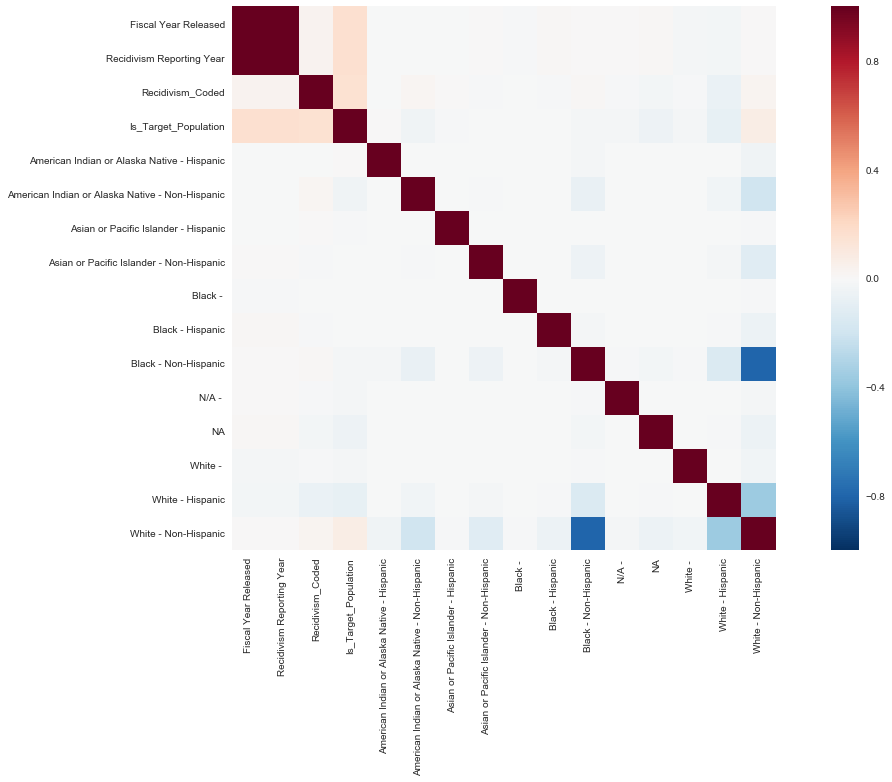

In [13]:
corrmat = df_new.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)

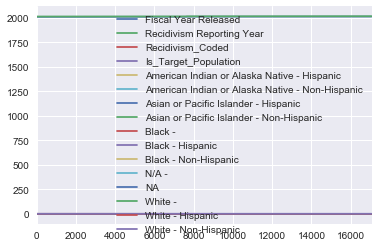

In [108]:
df_new.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d186d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114be5450>]], dtype=object)

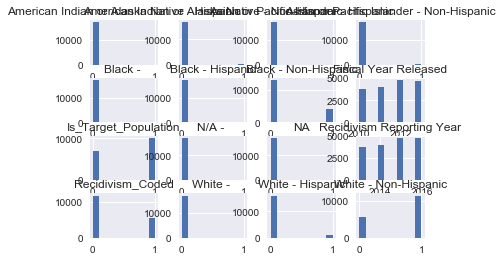

In [14]:
df_new.hist()

In [112]:
# cross tab by gender

print pd.crosstab(df_new['Recidivism_Coded'], df_new['Is_Female'], rownames=['Recidivism'])

#interesting, so if you are female, more likely you will not be sent back to prison 

Is_Female       0     1  NA
Recidivism                 
0           10111  1542   3
1            4845   559   0


In [15]:
#crosstab by age 
print pd.crosstab(df_new['Recidivism_Coded'], df_new['Age_Coded'], rownames=['Recidivism'])
#interesting, so it seems there is an inverse correlation between recidivism and age, the younger you are, the more likely
# you are to return to prison w/in 3 years of being released 

Age_Coded     12  29.5  39.5  49.5  67.5  NA
Recidivism                                  
0           1955  4165  2773  2103   657   3
1           1125  2080  1271   777   151   0


In [20]:
#let's take a look at logisitc regression, predicting recidivism from age, is_female, race columns (10 of them)

# create a clean data frame for the regression
cols_to_keep = ['Recidivism_Coded', 'Age_Coded', 'Is_Female']
data_for_model = df[cols_to_keep].join(df_race.ix[:, 'American Indian or Alaska Native - Non-Hispanic':])
print data_for_model.head()

   Recidivism_Coded Age_Coded Is_Female  \
0                 1        12         0   
1                 1      67.5         0   
2                 1      29.5         0   
3                 1      67.5         0   
4                 1      29.5         0   

   American Indian or Alaska Native - Non-Hispanic  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Asian or Pacific Islander - Hispanic  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Asian or Pacific Islander - Non-Hispanic  Black -   Black - Hispanic  \
0                                         0         0                 0   
1      

In [38]:
for x in data_for_model.columns.values:
    print x

Recidivism_Coded
Age_Coded
Is_Female
American Indian or Alaska Native - Non-Hispanic
Asian or Pacific Islander - Hispanic
Asian or Pacific Islander - Non-Hispanic
Black - 
Black - Hispanic
Black - Non-Hispanic
N/A - 
NA
White - 
White - Hispanic
White - Non-Hispanic


In [40]:
# want to merge N/A - and NA! 
data_for_model["N/A - "] = data_for_model["N/A - "] + data_for_model["NA"]

In [41]:
for x in data_for_model.columns.values:
    print x

Recidivism_Coded
Age_Coded
Is_Female
American Indian or Alaska Native - Non-Hispanic
Asian or Pacific Islander - Hispanic
Asian or Pacific Islander - Non-Hispanic
Black - 
Black - Hispanic
Black - Non-Hispanic
N/A - 
NA
White - 
White - Hispanic
White - Non-Hispanic


In [34]:
train_cols = data_for_model.columns[1:]
  # Index([recidivism, age, gender, 10 race categories) 
    
logit = sm.Logit(data_for_model['Recidivism_Coded'],data_for_model[train_cols])

  # fit the model
result = logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).